# Investigating the Physicochemical Properties and Quality Ratings of Red and White Wine Samples.
Dataset can be found: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Introduction
From a previous data, two datasets were created, using red and white wine samples. The inputs include objective tests (e.g. PH values) and the output is based on sensory data (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model these datasets under a regression approach. The support vector machine model achieved the best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T), etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
For more details, consult: http://www.vinhoverde.pt/en/ 

The aim of this study is to gain insight into this data collected.

## Data Wrangling


### Gathering Data

In [2]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# downloading datasets
url1 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url2 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
url3 = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names'

urlretrieve(url1, "winequality_red.csv")
urlretrieve(url2, "winequality_white.csv")
urlretrieve(url3, "winequality_details.txt")

('winequality_details.txt', <http.client.HTTPMessage at 0x17b0b0fc430>)

In [3]:
# reading data
red_df = pd.read_csv("winequality_red.csv", sep=";")
white_df = pd.read_csv("winequality_white.csv", sep=";")

Let's take a closer look at the attributes of these datasets and pose some questions for our analysis.

In [4]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Questions that can be of interest:

1. What chemical characteristics are most important in predicting the quality of wine?
1. Is a certain type of wine (red or white) associated with higher quality?
1. Do wines with higher alcoholic content receive better ratings?
1. Do sweeter wines (more residual sugar) receive better ratings?
1. What level of acidity is associated with the highest quality?

### Assessing Data
Using Pandas, explore `winequality-red.csv` and `winequality-white.csv` in the Jupyter notebook below to answer quiz questions below the notebook about these characteristics of the datasets:

* number of samples in each dataset
* number of columns in each dataset
* features with missing values
* duplicate rows in the white wine dataset
* number of unique values for quality in each dataset
* mean density of the red wine dataset


In [6]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


`white_df` dataset contains 4898 samples and 12 columns while the `red_df` dataset contains 1599 samples and 12 columns. Both datasets have no Null values.

In [8]:
white_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# number of duplicated rows in the red wine dataset
red_df.duplicated().sum()

240

In [11]:
# number of duplicated rows in the white wine dataset
white_df.duplicated().sum()

937

In [12]:
# number of unique values for each attribute in the white wine dataset
white_df.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [13]:
# number of unique values for each attribute in the red wine dataset
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Percentage significance of duplicated samples in the dataset

In [14]:
white_df.duplicated().sum() * 100 / len(white_df)

19.130257247856267

In [15]:
red_df.duplicated().sum() * 100 / len(red_df)

15.0093808630394

### Cleaning Data

Appending Columns

To analyze the data more quickly, let's combine the red and white wine data sets into one dataframe. To do this we will add a new feature or column to each data set to indicate whether the wine is red or white. This will help us keep track once the data sets are combined.

In [16]:
#  creating columns for color of wine
red_df['color'] = "red"
white_df['color'] = "white"

In [17]:
# appending white_df to red_df
wine_df = pd.concat([red_df, white_df], ignore_index=True)

In [18]:
wine_df.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [19]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

## Exploratory Data Analysis

Create some visuals to answer these questions
* Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? `fixed acidity`, `total sulfur dioxide`, `pH`, `alcohol`

* Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? `volatile acidity`, `residual sugar`, `pH`, `alcohol`

In [24]:
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid')

### Histograms for Various Features

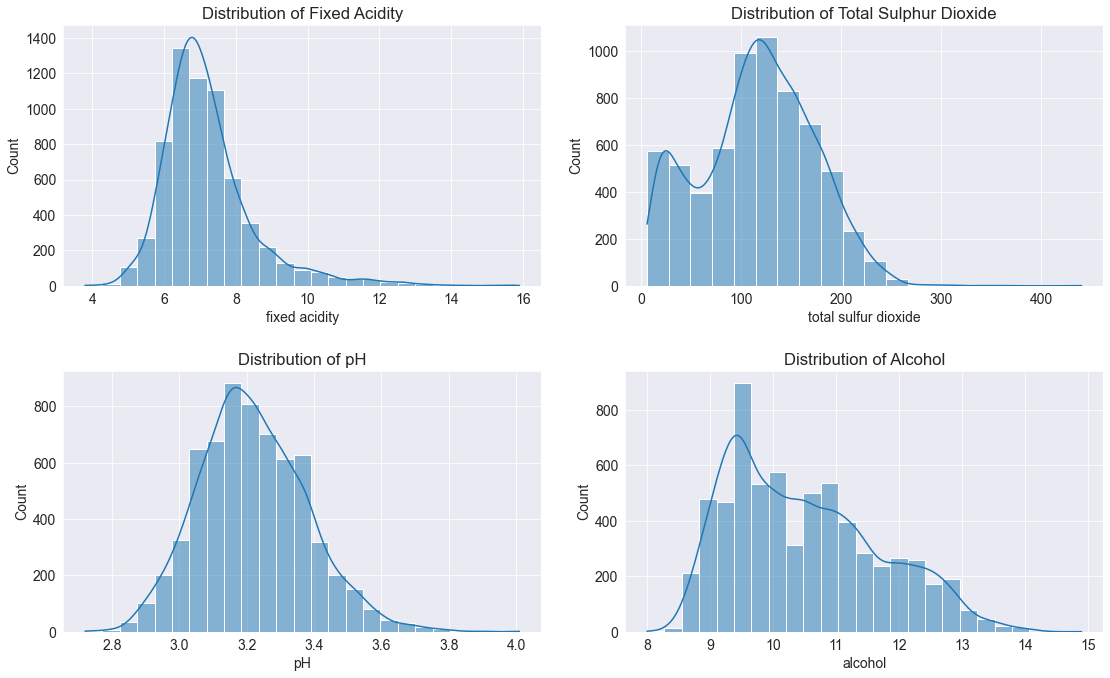

In [63]:
# we want to plot 4 figures at once. 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# visualizing `fixed acidity`
axes[0,0].set_title("Distribution of Fixed Acidity")
sns.histplot(wine_df['fixed acidity'], bins=25, kde=True, ax=axes[0,0]);

# visualizing `total sulphur dioxide`
axes[0,1].set_title("Distribution of Total Sulphur Dioxide")
sns.histplot(wine_df['total sulfur dioxide'], bins=20, kde=True, ax=axes[0,1]);

# visualizing `pH`
axes[1,0].set_title("Distribution of pH")
sns.histplot(wine_df['pH'], bins=25, kde=True, ax=axes[1,0]);

# visualizing `alcohol`
axes[1,1].set_title("Distribution of Alcohol")
sns.histplot(wine_df['alcohol'], bins=25, kde=True, ax=axes[1,1]);

plt.tight_layout(pad=2)

`fixed acidity` and `alcohol` feature variables appear skewed to the right.

### Scatterplots of Quality Against Various Features

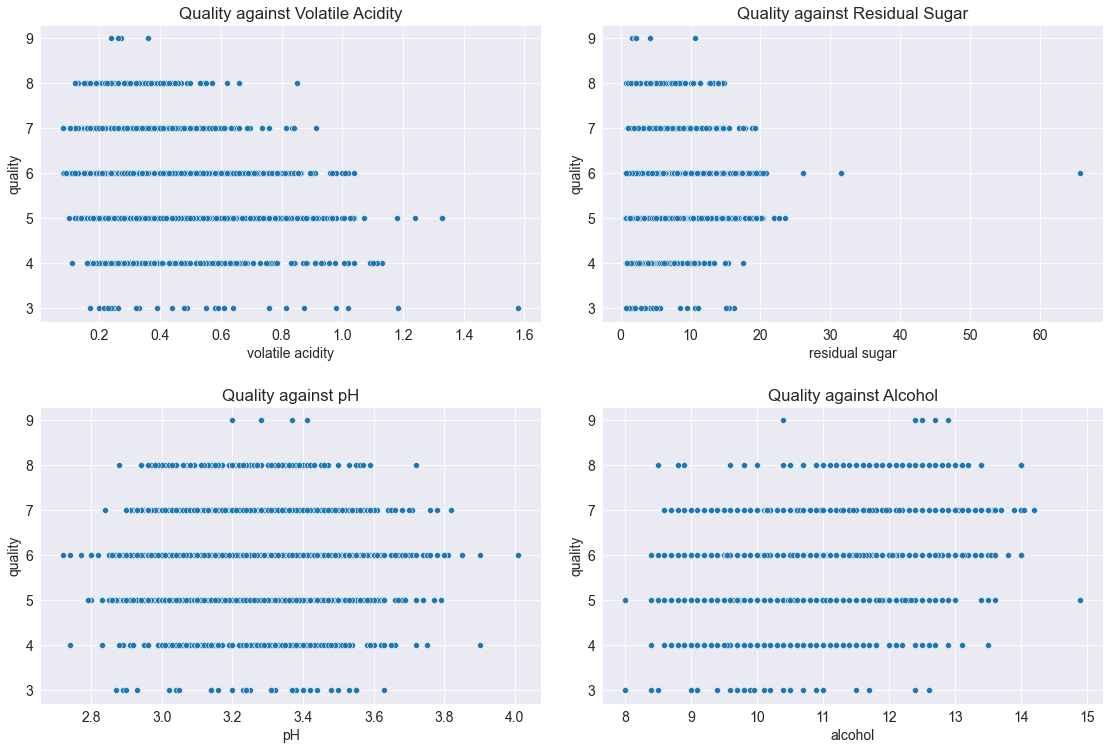

In [62]:
# we want to plot 4 figures at once. 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(16,11))

# visualizing `fixed acidity`
axes[0,0].set_title("Quality against Volatile Acidity")
sns.scatterplot(x="volatile acidity", y="quality", data=wine_df, ax=axes[0,0]);

# visualizing `total sulphur dioxide`
axes[0,1].set_title("Quality against Residual Sugar")
sns.scatterplot(x="residual sugar", y="quality", data=wine_df, ax=axes[0,1]);

# visualizing `pH`
axes[1,0].set_title("Quality against pH")
sns.scatterplot(x="pH", y="quality", data=wine_df, ax=axes[1,0]);

# visualizing `alcohol`
axes[1,1].set_title("Quality against Alcohol")
sns.scatterplot(x="alcohol", y="quality", data=wine_df, ax=axes[1,1]);

plt.tight_layout(pad=2)

From the scatterplots, it can be seen that the `alcohol` variable is more likely to have a positive impact on quality.

### Drawing Conclusions using Groupby

##### Q1: Is a certain type of wine (red or white) associated with higher quality?
Let's groupby color and find the mean quality of each group

In [67]:
wine_df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

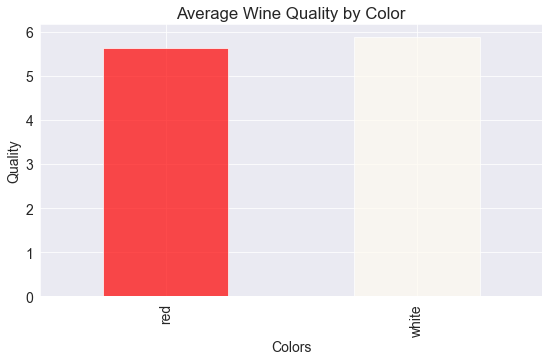

In [123]:
colors = ['red', 'floralwhite']
color_means = wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title='Average Wine Quality by Color', color=colors, alpha=0.7)
plt.xlabel('Colors')
plt.ylabel('Quality');

Although they both appear to be quiet similar in average quality, white wine tends to averagely be of a higher quality than red wine.

Let's dive deeper into this plot to see what's the cause of this relationship.

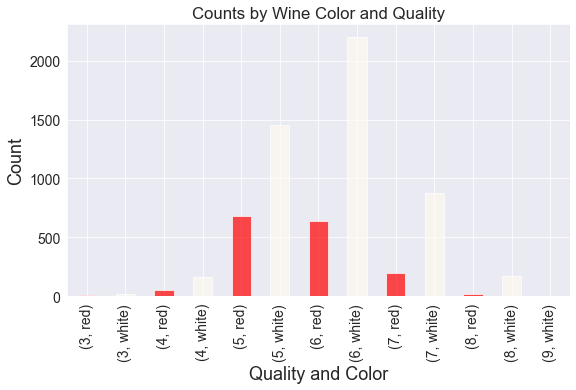

In [126]:
# since the counts for each column are the same, we can basically use anyone
counts = wine_df.groupby(['quality', 'color']).count()['pH']
counts.plot(kind='bar', title='Counts by Wine Color and Quality', color=colors, alpha=.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Count', fontsize=18);



Since, both datasets have unequal number of queries, let's divide the counts by the total number of entries per color.

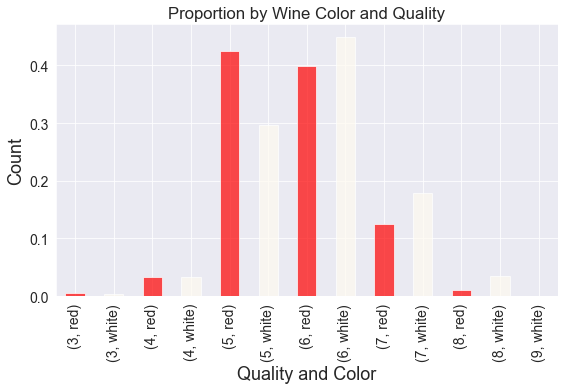

In [127]:
totals = wine_df.groupby('color').count()['pH']
proportions = counts / totals
proportions.plot(kind='bar', title='Proportion by Wine Color and Quality', color=colors, alpha=0.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Count', fontsize=18);

**Plotting Wine Type and Quality with Matplotlib**

Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [179]:
# get counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [180]:
# get total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [181]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
Name: pH, dtype: float64

We need to add a 9 rating for the red proportion so that we can plot

In [183]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

In [182]:
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

quality
3    0.004083
4    0.033279
5    0.297468
6    0.448755
7    0.179665
8    0.035729
9    0.001021
Name: pH, dtype: float64

**Plot proportions on a bar chart**

Set the x coordinate location for each rating group and width of each bar.

In [184]:
ind = np.arange(len(red_proportions)) # the x locations of the groups
width = 0.35

Now let's create the plot

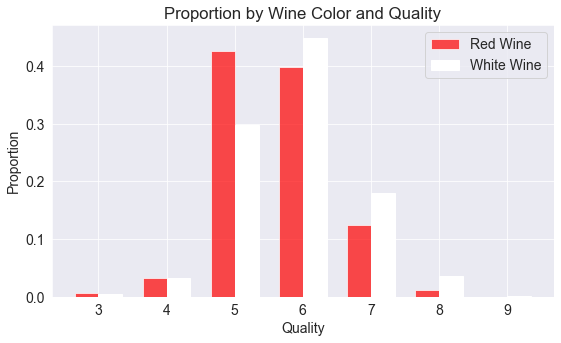

In [186]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

We'll like to address the messy tick labels, to group colors per quality together and there is missing bar at (9, red). Even though it's 0, we'd still like to see it. Let's move over to Matplotlib to plot this.

##### Q2: What level of acidity (pH value) receives the highest average rating?
```
Acidity Levels:
      1. High: Lowest 25% of pH values
      2. Moderately High: 25% - 50% of pH values
      3. Medium: 50% - 75% of pH values
      4. Low: 75% - max pH value
```

In [79]:
# view the min, 25%, 50%, 75% and max pH values
wine_df['pH'].describe().loc[['min','25%','50%','75%','max']]

min    2.72
25%    3.11
50%    3.21
75%    3.32
max    4.01
Name: pH, dtype: float64

In [80]:
# labels for the four acidity level groups
bin_names = ['High', 'Moderately High', 'Medium', 'Low']

In [84]:
# create acidity_level column
wine_df['acidity_level'] = pd.qcut(wine_df['pH'], [0,0.25,0.5,0.75,1], labels=bin_names)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately High
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low


In [141]:
# find the mean quality by acidity level
avgQuality_by_acidityLevel = wine_df.groupby("acidity_level")['quality'].mean().sort_values(ascending=False)
avgQuality_by_acidityLevel

acidity_level
Low                5.859593
Medium             5.850832
Moderately High    5.784540
High               5.783469
Name: quality, dtype: float64

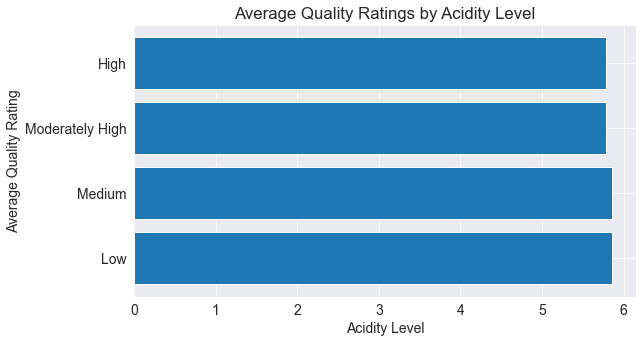

In [158]:
locations = [1,2,3,4]
heights = avgQuality_by_acidityLevel.values
labels = avgQuality_by_acidityLevel.index
 
plt.barh(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

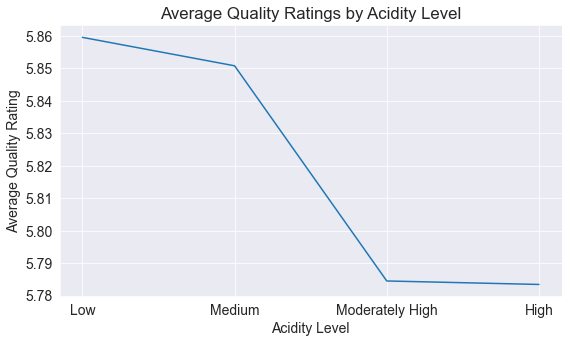

In [168]:
plt.plot(avgQuality_by_acidityLevel)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel("Acidity Level")
plt.ylabel('Average Quality Rating');

It appears that on an average, wines with low acidity levels have a better quality.

### Drawing Conclusions Using Query

##### Q1: Do wines with higher alcoholic content receive better ratings?
Use query to create two groups of wine samples:

       1. Low alcohol (samples with an alcohol content less than median)
       2. High alcohol (samples with an alcohol content greater than or equal to the median)

Then find the mean quality rating of each group.

In [97]:
# get the median amount of alcohol content
median_alc = wine_df.alcohol.median()

In [98]:
# selecting samples with an alcohol content less than median
low_alcohol = wine_df.query('alcohol < @median_alc')

# selecting samples with an alcohol content greater than or equal to median
high_alcohol = wine_df.query('alcohol >= @median_alc')

In [99]:
# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

Average quality of both wine samples based on alcoholic content.

In [129]:
low_alcohol_mean = low_alcohol.quality.mean()
high_alcohol_mean = high_alcohol.quality.mean()
print("Low Alcohol:\t",low_alcohol_mean)
print("High Alcohol:\t",high_alcohol_mean)

Low Alcohol:	 5.475920679886686
High Alcohol:	 6.146084337349397


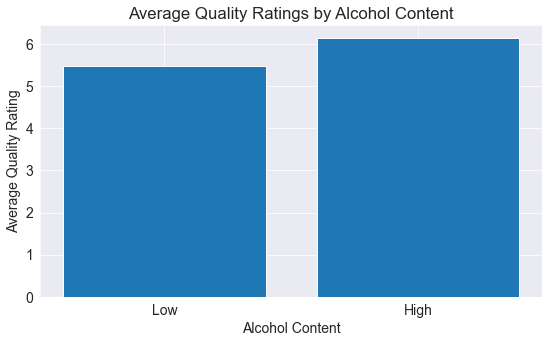

In [137]:
# create a bar chart with proper labels
locations = [1,2]
heights = [low_alcohol_mean, high_alcohol_mean]
labels = ['Low', 'High']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

We can see that wines with higher alcoholic content tend to have a higher rating.

##### Q2: Do sweeter wines (more residual sugar) receive better ratings?

In [102]:
# get the median amount of residual sugar
median_sugar = wine_df['residual sugar'].median()

In [103]:
# selecting samples with residual sugar less than the median
low_sugar = wine_df.query("`residual sugar` < @median_sugar")

# selecting samples with residual sugar greater then the median
high_sugar = wine_df.query("`residual sugar` >= @median_sugar")

In [104]:
# testing to see these queries included each sample exactly once
num_samples == high_sugar['quality'].count() + low_sugar['quality'].count() # should be True

True

Average quality of wine samples based on residual sugar.

In [138]:
low_sugar_mean = low_sugar.quality.mean()
high_sugar_mean = high_sugar.quality.mean()

print("Low Sugar:\t", low_sugar_mean)
print("High sugar:\t",high_sugar_mean)

Low Sugar:	 5.808800743724822
High sugar:	 5.82782874617737


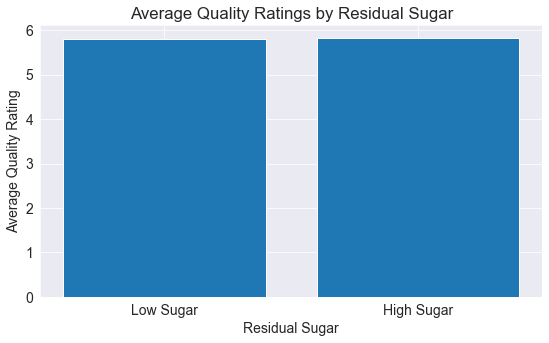

In [140]:
locations = [1,2]
heights = [low_sugar_mean, high_sugar_mean]
labels = ['Low Sugar', 'High Sugar']

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

Although the quality of both samples are similar, those of higher residual sugar content tend to be of more quality.